# Creating a Semantic Layer on a CSV Dataset

This notebook demonstrates how to implement a semantic layer on top of a structured CSV file using natural language interfaces powered by tools like PandasAI. The semantic layer adds context and meaning to raw data, enabling more intuitive and accurate interactions through large language models.

---

## What is a Semantic Layer?

A semantic layer serves as a bridge between raw tabular data and a natural language interface. It adds metadata and human-readable meaning to otherwise ambiguous column names and values, making it easier for language models (such as GPT-3.5) to interpret and generate accurate insights.

---

## Why Use a Semantic Layer?

- **Adds Context and Meaning**  
  Helps clarify what each column in the dataset represents (e.g., "FBS" becomes "Fasting Blood Sugar").

- **Improves Language Model Understanding**  
  Large Language Models perform more effectively when data is semantically labeled and contextualized.

- **Reusable Across Sessions**  
  Once defined, the semantic layer can be used across multiple sessions and queries without needing to redefine the context.

---

## Dataset Overview

This example uses a heart disease dataset:https://www.kaggle.com/datasets/arezaei81/heartcsv that includes features such as:

- Age
- Sex
- Chest Pain Type
- Resting Blood Pressure
- Serum Cholesterol
- Fasting Blood Sugar
- Resting ECG
- Maximum Heart Rate
- ST Depression (Oldpeak)
- Slope of ST Segment
- Exercise-Induced Angina
- Target Variable (Heart Disease Presence)

---

## Objectives

- Attach a language model (e.g., GPT-3.5 Turbo) to a DataFrame
- Define and apply semantic context to the dataset
- Use natural language to query the data
- Generate statistical insights and visualizations without manually coding SQL or Pandas operations

---

## Tools and Libraries

- `pandas`
- `pandasai`
- `pandasai_litellm` (LiteLLM wrapper for OpenAI/GPT models)


In [ ]:
import pandasai as pai

In [ ]:
# Load the heart disease dataset
file_df = pai.read_csv("heart.csv")

# Display the first few rows
file_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Creating the Semantic Layer

To build the semantic layer, the following components are required:

- **`path`**:  
  A string that defines the location of the dataset. It must follow the format `'organization/dataset'`.

- **`name`**:  
  A clear and descriptive name for the dataset.

- **`df`**:  
  The actual DataFrame object that holds the dataset.

- **`description`**:  
  A brief summary that provides context or an overview of the dataset.

- **`columns`**:  
  A list of dictionaries, where each dictionary defines metadata for a specific column using the following structure:

  ```python
  {
      "name": "column_name",
      "type": "column_type",      # Accepted types: string, number, date, datetime
      "description": "column_description"
  }


In [ ]:
print(file_df.columns)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


In [ ]:
dataset = pai.create(
    path="organization/heart-v2",
    description="Heart Disease Dataset",
    df=file_df,
    columns=[
        {
            "name": "age",
            "type": "integer",
            "description": "Age of the patient in years"
        },
        {
            "name": "sex",
            "type": "string",
            "description": "Gender of the patient (1: Male, 0: Female)"
        },
        {
            "name": "cp",
            "type": "integer",
            "description": "Chest pain type (1: Typical Angina, 2: Atypical Angina, 3: Non-anginal Pain, 4: Asymptomatic)"
        },
        {
            "name": "trestbps",
            "type": "integer",
            "description": "Resting blood pressure in mm Hg"
        },
        {
            "name": "chol",
            "type": "integer",
            "description": "Serum cholesterol in mg/dl"
        },
        {
            "name": "fbs",
            "type": "integer",
            "description": "Fasting blood sugar (1: if > 120 mg/dl, 0: otherwise)"
        },
        {
            "name": "restecg",
            "type": "integer",
            "description": "Resting electrocardiographic results (0: Normal, 1: ST-T wave abnormality, 2: Left ventricular hypertrophy)"
        },
        {
            "name": "thalach",
            "type": "integer",
            "description": "Maximum heart rate achieved"
        },
        {
            "name": "exang",
            "type": "integer",
            "description": "Exercise induced angina (1: Yes, 0: No)"
        },
        {
            "name": "oldpeak",
            "type": "float",
            "description": "ST depression induced by exercise relative to rest"
        },
        {
            "name": "slope",
            "type": "integer",
            "description": "Slope of the peak exercise ST segment (1: Upsloping, 2: Flat, 3: Downsloping)"
        },
        {
            "name": "ca",
            "type": "integer",
            "description": "Number of major vessels (0-3) colored by fluoroscopy"
        },
        {
            "name": "thal",
            "type": "integer",
            "description": "Thalassemia (3: Normal, 6: Fixed defect, 7: Reversible defect)"
        },
        {
            "name": "target",
            "type": "integer",
            "description": "Heart disease presence (0: No disease, 1: Disease present)"
        }
    ]
)

Dataset saved successfully to path: organization/heart-v2


## Loading the Semantic DataFrame

Once the DataFrame has been saved with its semantic layer, it can be reloaded in any session using the `load()` method. This functionality enables:

- **Preservation of Context**  
  Maintains semantic information such as column descriptions and types across sessions, eliminating the need to redefine metadata.

- **Natural Language Interaction**  
  Allows you to ask meaningful questions about your data using plain English.

- **Improved Analysis and Visualizations**  
  Enhances the accuracy of responses and charts by providing clear context for the underlying data.


In [ ]:
dataset = pai.load("organization/heart-v2")

Dataset loaded successfully.


## Chatting with Your DataFrame

With the semantic layer in place, you can now interact with your DataFrame using natural language through the `chat()` method.

PandasAI enables seamless integration with various large language models (LLMs), allowing for intuitive exploration and analysis of data. In this example, we are using the `LiteLLM` interface to connect to an OpenAI mod.g., GPT-3.5 Turbo).

This functionality supports:

- Natural language queries about the dataset  
- Automatic generation of summaries, insights, and visualizations  
- An accessible and user-friendly interface for data exploration


In [ ]:
from pandasai_litellm.litellm import LiteLLM

llm = LiteLLM(model="gpt-4.1-mini", api_key="OPENAI_API_KEY")

# Configure PandasAI to use the LLM
pai.config.set({
    "llm": llm
})

# Load the semantically enhanced dataset
dataset = pai.load("organization/heart-v2")

# Ask a question
response = dataset.chat("What is the correlation between age and cholesterol?")

print(response)

Dataset loaded successfully.
0.2136779565595617


In [ ]:
!pip install pandas pandasai pandasai-litellm --quiet

## Using Prompt Style with SmartDataframe

Initially, I tested the prompt-based interaction using the `SmartDataframe` interface:

```python
df_ai = SmartDataframe(df, config={"llm": llm})
response = df_ai.chat("What features are most correlated with heart disease?")

Upon execution the following deprecation warning was issued:

DeprecationWarning:
********************************************************************************
DEPRECATION WARNING:
SmartDataframe will soon be deprecated. Please use df.chat() instead.
********************************************************************************



In [ ]:

from pandasai_litellm.litellm import LiteLLM
from pandasai import SmartDataframe
import pandas as pd

# Set up GPT-3.5 Turbo LLM
llm = LiteLLM(
    model="gpt-3.5-turbo",
    api_key="OPENAI_API_KEY"  #  OpenAI API key
)

#Wrap your the DataFrame
df_ai = SmartDataframe(df, config={"llm": llm})

prompt = """
You are a data analyst assistant working with a heart disease dataset.
The dataset contains the following columns:

- Age: Age of the patient in years
- Sex: Gender of the patient (M or F)
- ChestPainType: Type of chest pain (ATA, NAP, ASY, TA)
- RestingBP: Resting blood pressure (mm Hg)
- Cholesterol: Serum cholesterol (mg/dl)
- FastingBS: Fasting blood sugar (1: if >120 mg/dl, else 0)
- RestingECG: ECG results (Normal, ST, LVH)
- MaxHR: Maximum heart rate achieved
- ExerciseAngina: Exercise-induced angina (Y/N)
- Oldpeak: ST depression induced by exercise
- ST_Slope: Slope of ST segment (Up, Flat, Down)
- HeartDisease: Target variable (1 = presence of heart disease, 0 = no disease)

Please analyze and summarize any patterns, correlations, or potential predictors of heart disease in this dataset.

Start by identifying which features are most correlated with HeartDisease.
Then, feel free to suggest visualizations or comparisons (e.g. cholesterol vs. age, MaxHR by gender, etc.).
"""
response = df_ai.chat(prompt)
print(response)


/tmp/ipykernel_83684/3961350583.py:12: DeprecationWarning: 
********************************************************************************
DEPRECATION WARNING:
SmartDataframe will soon be deprecated. Please use df.chat() instead.
********************************************************************************

  df_ai = SmartDataframe(df, config={"llm": llm})


target      1.000000
cp          0.433798
thalach     0.421741
slope       0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trestbps   -0.144931
age        -0.225439
sex        -0.280937
thal       -0.344029
ca         -0.391724
oldpeak    -0.430696
exang      -0.436757
Name: target, dtype: float64


This output highlights features like cp (chest pain type), thalach (maximum heart rate), and slope as having the strongest positive correlations with heart disease, while variables like exang (exercise-induced angina) and oldpeak show strong negative correlations.

## Transition to the `df.chat()` Approach

Following the deprecation warning issued when using `SmartDataframe`, I decided to adopt the newer and recommended `df.chat()` interface for interacting with the dataset.

### Reason for the Change

The warning clearly indicated that `SmartDataframe` will soon be deprecated. To ensure long-term compatibility and to align with the latest API design, transitioning to `df.chat()` was the logical next step.

### Updated Implementation

The updated approach attaches the LLM configuration directly to the DataFrame:

```python
df.chat = pandasai.Chat(df, config={"llm": llm})
response = df.chat("What features are most correlated with heart disease?")


## Continuing the Analysis with Natural Language Queries

After successfully setting up the semantic layer and transitioning to the `df.chat()` interface, I proceeded to interact with the dataset by asking additional questions in natural language.

This approach allowed for a more intuitive and flexible way to explore the data, identify patterns, and generate visualizations without the need to write complex code.

By leveraging the language model, I was able to:

- Query relationships between variables such as cholesterol, age, and heart disease presence
- Generate visual comparisons by sex and condition
- Explore potential risk factors and their distributions across subgroups

This conversational interaction significantly enhanced the efficiency and accessibility of the data exploration process.


In [ ]:
# 1. What features are most correlated with heart disease?
print(dataset.chat("What features are most correlated with heart disease?"))

     feature  correlation
0      exang    -0.435316
1         cp     0.432367
2    oldpeak    -0.429275
3    thalach     0.420349
4         ca    -0.390431
5      slope     0.344736
6       thal    -0.342894
7        sex    -0.280009
8        age    -0.224695
9   trestbps    -0.144453
10   restecg     0.136777
11      chol    -0.084958
12       fbs    -0.027953


ChartResponse(type='chart', value='exports/charts/temp_chart_890a756a-562d-48d5-8cb3-efdd99d65ec2.png')

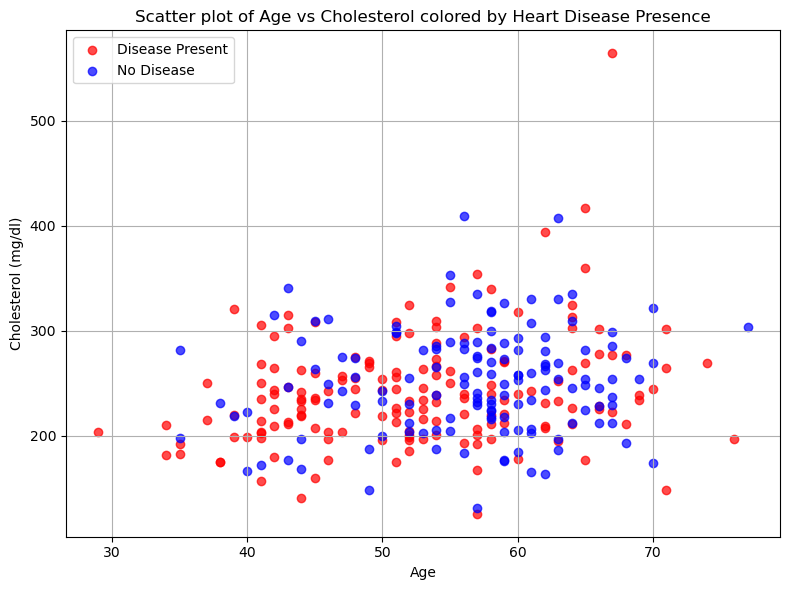

In [ ]:
# 2. Show a scatter plot of age vs cholesterol colored by target
dataset.chat("Show a scatter plot of age vs cholesterol colored by target")

## Summary: Age vs Cholesterol Scatter Plot

The scatter plot visualizes the relationship between patient age and cholesterol levels, with data points colored by heart disease presence.

### Key Findings:

- **No Strong Age-Based Trend**:  
  Cholesterol levels are widely distributed across all age groups, particularly between ages 50 and 65. There is no clear linear correlation between age and cholesterol.

- **Overlap Between Groups**:  
  Both patients with and without heart disease exhibit overlapping cholesterol levels, making it difficult to distinguish between the two groups based on cholesterol alone.

- **Higher Cholesterol and Heart Disease**:  
  There is a moderate concentration of patients with heart disease (red points) in the higher cholesterol range (250–350 mg/dl), suggesting a potential relationship.

- **Notable Outliers**:  
  A small number of patients, particularly those under age 45, have very high cholesterol. Some of these are also associated with heart disease, indicating possible early risk.

### Conclusion:

While age and cholesterol are individually important health indicators, this visualization shows that **cholesterol may have a moderate association with heart disease**, though not a direct correlation with age. Additional features and multivariate analysis may be needed to strengthen predictive insights.


In [ ]:
# 3. What is the average cholesterol for patients over 60?
print(dataset.chat("What is the average cholesterol for patients over 60?"))

260.1518987341772


In [ ]:
# 4. Compare the average max heart rate between patients with and without heart disease
print(dataset.chat("Compare the average max heart rate between patients with and without heart disease"))

   heart_disease_presence  avg_max_heart_rate
0                       0          139.101449
1                       1          158.466667


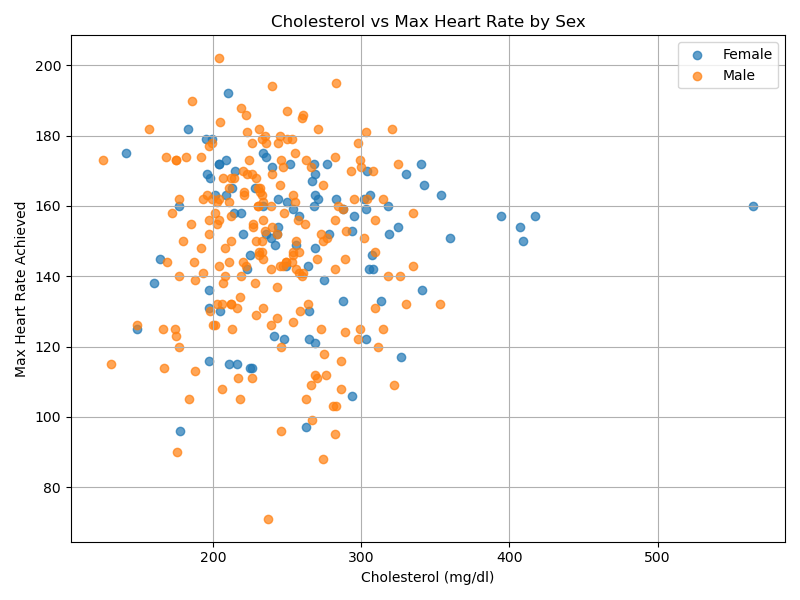

In [ ]:
from IPython.display import Image, display

chart_result = dataset.chat("Plot cholesterol vs max heart rate by sex")
if hasattr(chart_result, "type") and chart_result.type == "chart":
    display(Image(filename=chart_result.value))
else:
    print(chart_result)


## Summary: Cholesterol vs Max Heart Rate by Sex

This scatter plot illustrates the relationship between serum cholesterol levels and maximum heart rate achieved, with data points differentiated by sex.

### Key Findings:

- **No Clear Correlation**:  
  There is no strong linear relationship between cholesterol and maximum heart rate. Data points are scattered broadly without forming a discernible trend.

- **Sex-Based Distribution**:  
  - Both male and female patients are distributed across the full range of cholesterol and heart rate values.
  - Males (orange) and females (blue) appear relatively balanced, though males are slightly more represented across all cholesterol levels.

- **Heart Rate Range**:  
  Most patients, regardless of sex, achieved maximum heart rates between **120 and 180 bpm**.

- **Cholesterol Range**:  
  Cholesterol levels for both sexes mostly fall within the **180 to 300 mg/dl** range, with a few outliers beyond 400 mg/dl.

### Conclusion:

The visualization suggests that **cholesterol levels do not strongly influence maximum heart rate**, and **sex does not appear to significantly alter this relationship**. Additional variables or multivariate analysis may be needed to uncover deeper insights.


In [ ]:
#  What age group has the highest risk of heart disease?
dataset.chat("What age group has the highest risk of heart disease?")

StringResponse(type='string', value='The age group with the highest risk of heart disease is 20-29 with a disease percentage of 100.0%')

In [ ]:
#  Compare average cholesterol between those with and without heart disease
dataset.chat("Compare average cholesterol between those with and without heart disease")

DataFrameResponse(type='dataframe', value=   target  avg_cholesterol
0       0       251.086957
1       1       242.230303)

ChartResponse(type='chart', value='exports/charts/temp_chart_467e04f6-9a3c-4496-8bfa-99bdc5b3b1d9.png')

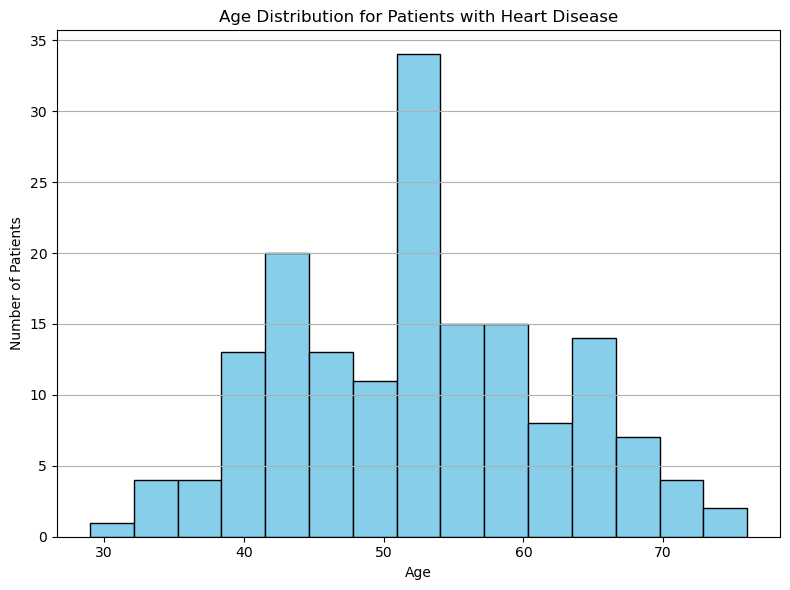

In [ ]:
# Show a histogram of age distribution for patients with heart disease
dataset.chat("Show a histogram of age distribution for patients with heart disease")

ChartResponse(type='chart', value='exports/charts/temp_chart_613adee4-cde2-442d-9ab9-e5225e78261b.png')

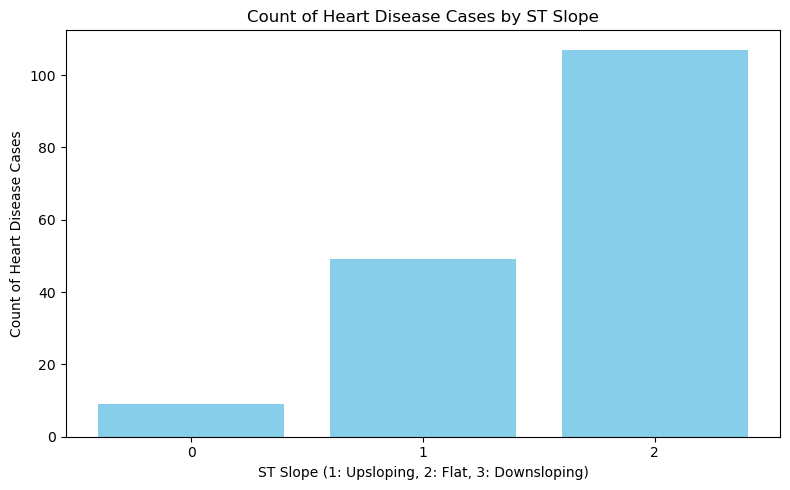

In [ ]:
# Create a bar chart showing the count of heart disease cases by ST slope
dataset.chat("Create a bar chart showing the count of heart disease cases by ST slope")

In [ ]:
# Compare the average max heart rate for patients above and below age 50
dataset.chat("Compare the average max heart rate for patients above and below age 50")

DataFrameResponse(type='dataframe', value=     age_group  avg_max_heart_rate
0  50 or Below          160.800000
1     Above 50          144.552885)

In [ ]:
# What is the correlation between fasting blood sugar and heart disease?
dataset.chat("What is the correlation between fasting blood sugar and heart disease?")

StringResponse(type='string', value='The correlation between fasting blood sugar and heart disease presence is -0.028.')

## Correlation Between Fasting Blood Sugar and Heart Disease

Upon querying the dataset for the relationship between fasting blood sugar and heart disease presence, the model returned the following result:

**Correlation coefficient: -0.028**

### Interpretation:

- The correlation value is **very close to zero**, indicating **virtually no linear relationship** between fasting blood sugar levels and the presence of heart disease in this dataset.
- This suggests that **fasting blood sugar alone is not a strong predictor** of heart disease in this population sample.
- It may still be relevant in combination with other features in multivariate analysis, but by itself, its predictive power appears minimal.


In [ ]:
# What is the percentage of patients with exercise-induced angina by sex?
dataset.chat("What is the percentage of patients with exercise-induced angina by sex?")

DataFrameResponse(type='dataframe', value=      sex  percentage_with_exang
0  Female                  22.92
1    Male                  37.20)